In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
minerals = ["Manganese", "Lithium", "Cobalt", "Nickel"]

In [3]:
top_reserves_by_mineral = pd.read_csv("ReservesByMineral.csv")
reserves_totals = top_reserves_by_mineral.groupby('Mineral', as_index=False)["Aggregate Reserves & Resources (tonnes)"].agg('sum')

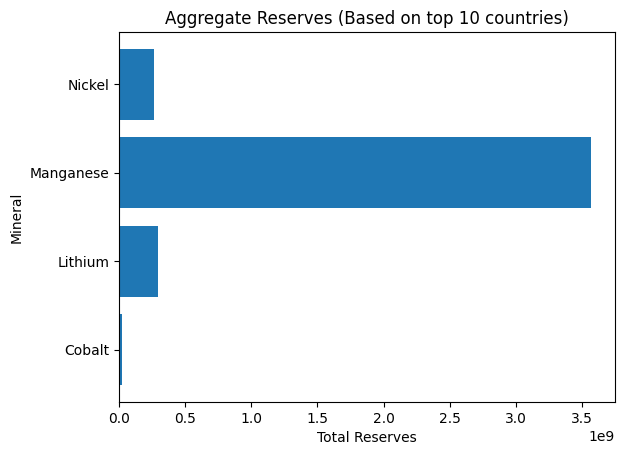

In [4]:
plt.figure()
plt.barh(y = reserves_totals['Mineral'], width = reserves_totals["Aggregate Reserves & Resources (tonnes)"])
plt.title("Aggregate Reserves (Based on top 10 countries)")
plt.xlabel("Total Reserves")
plt.ylabel("Mineral")
plt.show()

In [84]:
import re
combined = None
for i, mineral in enumerate(minerals):
    
    data = pd.read_excel("SPGlobal_MetalsAndMiningProperties-Nov-2024.xls", sheet_name = mineral, header=1)
    print(f"Read {mineral}")

    c = "Country/Region Risk Score & Outlook"
    
    pattern = r"(?P<Risk_Score>\d+.?\d+)?(?P<Risk_Category>[\w\s]+)?\s*-\s*(?P<Change_Indicator>[\w\s]+)"
    separate_risk_vals = data[c].str.extract(pattern)
    separate_risk_vals.columns = [col.replace('_', ' ') for col in separate_risk_vals.columns]
    separate_risk_vals["Risk Score"] = separate_risk_vals["Risk Score"].astype(float)

    
    for i, x in enumerate(separate_risk_vals.columns):
        data.insert(list(data.columns).index(c) + i , x, separate_risk_vals[x])
        
    
    data.drop(c, axis = 1 ,inplace=True)
    data.dropna(subset="Primary Reserves and Resources", inplace = True)
    data["Reserves & Resources As Of Date"] = pd.to_datetime(data["Reserves & Resources As Of Date"])
    
    data["Primary Mineral"] = mineral
    

    if i == 0:
        combined = data
        continue
    
    combined = pd.concat([combined, data], ignore_index=True)
    
    

Read Manganese
Read Lithium
Read Cobalt
Read Nickel


In [87]:
combined

,Property,Property ID,Owner(s),Country/Region,Risk Score,Risk Category,Change Indicator,Development Stage,Activity Status,Commodity(s),Primary Reserves and Resources,Unit,Total In-Situ Value ($M),Reserves & Resources As Of Date,Primary Mineral
0,Nchwaning/Gloria,53686,"African Rainbow Minerals Ltd., Assore Ltd.",South Africa,2.7,High,No Change,Expansion,Active,Manganese,752840000.0,tonnes,2040.196400,2023-06-30,Manganese
1,Tshipi Borwa,59772,"Jupiter Mines Ltd., Ntsimbintle Mining (Pty.)...",South Africa,2.7,High,No Change,Operating,Active,"Manganese, Iron Ore",427901624.0,tonnes,1159.613401,2024-06-30,Manganese
2,Moanda,54303,"ERAMET S.A., Unnamed Owner",Gabon,2.5,High,No Change,Expansion,Active,Manganese,416000000.0,tonnes,1127.360000,2024-01-01,Manganese
3,Oakover,58513,"Black Canyon Ltd., QGold Pty Ltd",Australia,1.4,Moderate,No Change,Feasibility,Active,"Manganese, Copper, Cobalt, Iron Ore, Gold, Sil...",312000000.0,tonnes,845.520000,2023-12-12,Manganese
4,Butcherbird,39284,Element 25 Ltd.,Australia,1.4,Moderate,No Change,Expansion,On Hold Awaiting Higher Prices,"Manganese, Copper, Cobalt, Gold, Iron Ore",259600000.0,tonnes,703.516000,2024-06-30,Manganese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Spargoville,32059,"Unnamed Owner, Estrella Resources Ltd., Auric...",Australia,1.4,Moderate,No Change,Feasibility Started,Active,"Nickel, Gold, Lithium, Cobalt, Copper, Lead, P...",2370.0,tonnes,42.564649,2023-10-16,Nickel
502,Mjovattnet,91011,Kendrick Resources PLC,Sweden,1.3,Moderate,No Change,Exploration,Active,"Nickel, Copper, Cobalt, Platinum",2200.0,tonnes,40.121486,2023-08-07,Nickel
503,Hidden Bay,34690,"Uranium Energy Corp., Ovintiv Inc., ENUSA Ind...",Canada,1.4,Moderate,No Change,Prefeas/Scoping,Active,"U3O8, Cobalt, Nickel",1435.0,tonnes,3636.830259,2022-10-31,Nickel
504,Maude Lake,84130,Transition Metals Corp.,Canada,1.4,Moderate,No Change,Target Outline,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, G...",907.0,tonnes,19.050188,2022-09-12,Nickel


In [7]:
import plotly.express as px

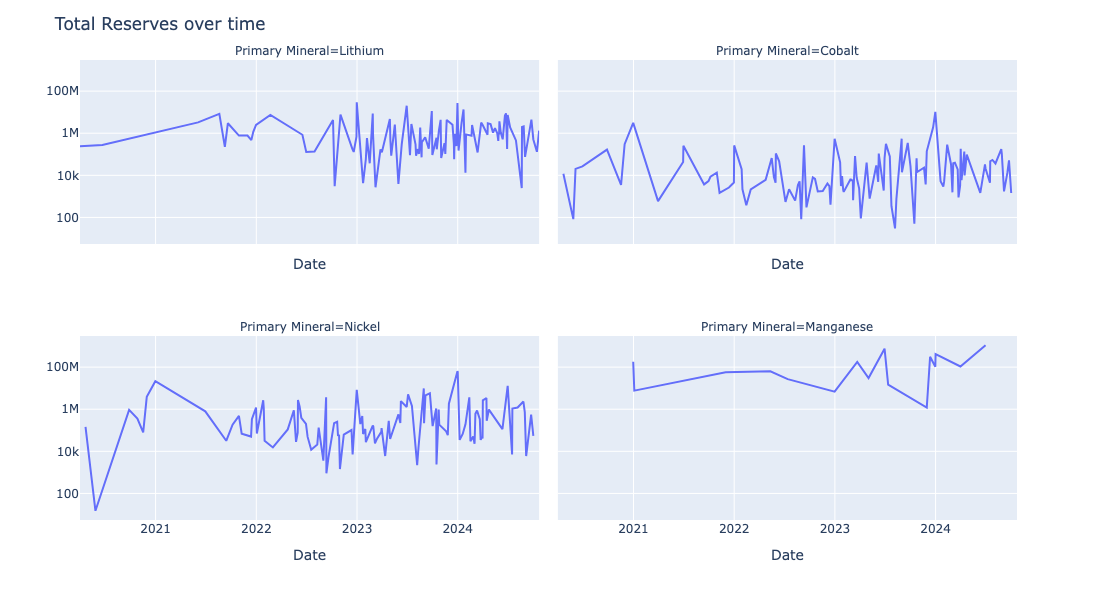

In [91]:
reserves_over_time = combined \
        .groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


fig = px.line(reserves_over_time, x="Reserves & Resources As Of Date", facet_col = "Primary Mineral", 
        y="Primary Reserves and Resources", log_y = True, facet_col_wrap=2, facet_row_spacing=0.2)

fig.update_xaxes(title_text="Date")
fig.update_layout(title = "Total Reserves over time", height = 600, width = 1000)
fig.update_yaxes(title_text=None)
fig.show()

In [9]:
def get_breakdown_by_mine(df, year):
    reserves_from_year = df[df["Reserves & Resources As Of Date"].dt.year == year].copy()
    reserves_from_year["Property ID"] = reserves_from_year["Property ID"].astype(str)
    
    fig = px.bar(
        reserves_from_year.sort_values('Primary Mineral'),
        y="Primary Mineral",
        x="Primary Reserves and Resources",
        color="Property ID",
        title=f"Primary Resources and Reserves per Mine in {year}",
        barmode="stack",  # Use "stack" for a stacked bar chart
        log_x = True
    )
    
    fig.update_layout(
        xaxis_title="Primary Reserves and Resources (tonnes)",
        xaxis_tickangle=45
    )
    fig.show()
    

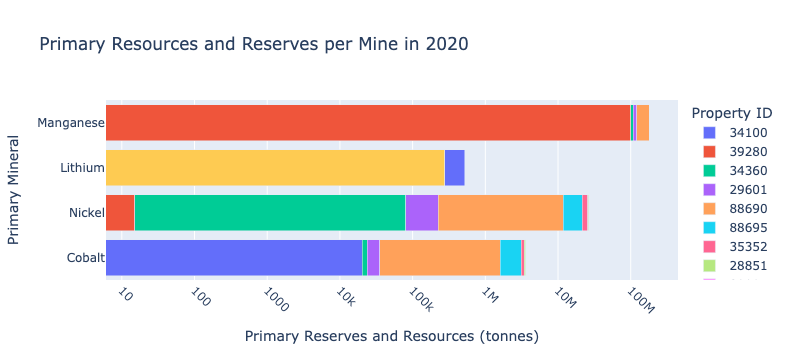

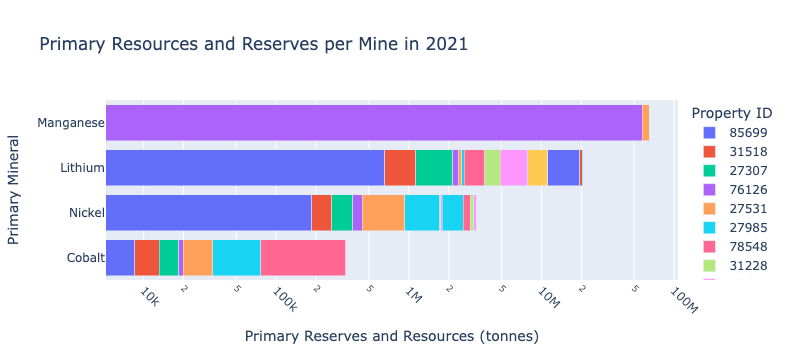

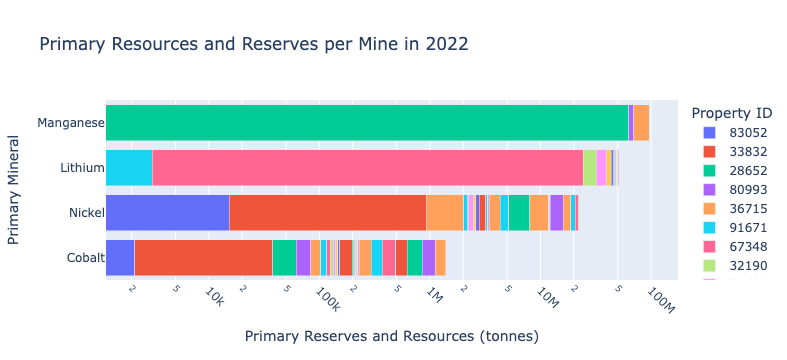

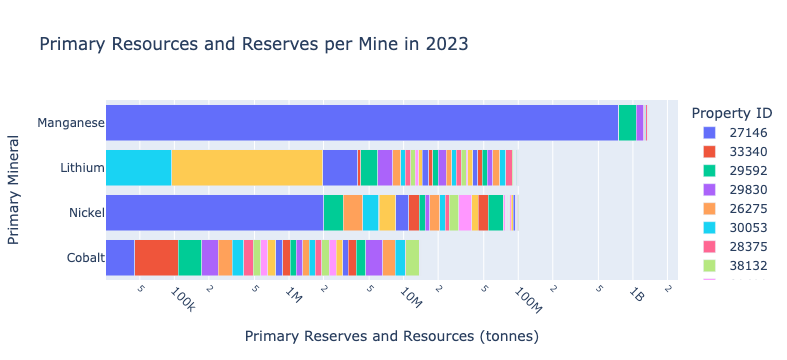

In [23]:
get_breakdown_by_mine(combined, 2020)
get_breakdown_by_mine(combined, 2021)
get_breakdown_by_mine(combined, 2022)
get_breakdown_by_mine(combined, 2023)

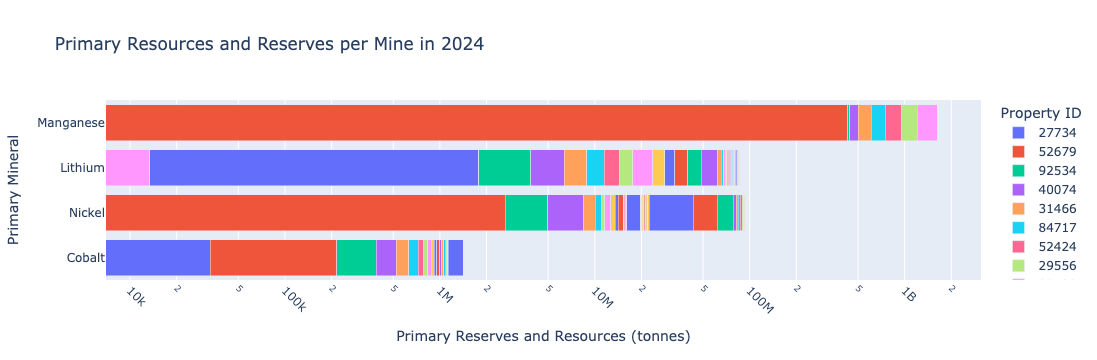

In [90]:
get_breakdown_by_mine(combined, 2024)